In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
# Reading the csv data - MNIST data
data = pd.read_csv('digit_recogniser/train.csv')

In [60]:
# Convert the data into a numpy array
data = np.array(data)
m, n = data.shape
# Shuffle before splitting into dev and training sets
np.random.shuffle(data)

In [61]:
# Preparing the training and testing data

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [62]:
# Initialising parameters
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation Function Relu for first hidden layer
def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax activation function for the output layer
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward Propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# derivative of Relu activation function
def ReLU_deriv(Z):
    return Z > 0

# One hot encoding of labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward Propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Updating the parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [63]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [64]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 0 6 ... 9 2 0] [7 6 3 ... 6 7 0]
0.11031707317073171
Iteration:  10
[4 0 6 ... 9 2 0] [7 6 3 ... 6 7 0]
0.19373170731707318
Iteration:  20
[4 0 8 ... 9 2 0] [7 6 3 ... 6 7 0]
0.26707317073170733
Iteration:  30
[4 9 8 ... 9 2 0] [7 6 3 ... 6 7 0]
0.32153658536585367
Iteration:  40
[7 6 8 ... 6 3 0] [7 6 3 ... 6 7 0]
0.36385365853658536
Iteration:  50
[7 6 8 ... 6 3 0] [7 6 3 ... 6 7 0]
0.4146341463414634
Iteration:  60
[7 6 8 ... 6 3 0] [7 6 3 ... 6 7 0]
0.4684878048780488
Iteration:  70
[7 6 8 ... 6 3 0] [7 6 3 ... 6 7 0]
0.5141951219512195
Iteration:  80
[7 6 8 ... 6 3 0] [7 6 3 ... 6 7 0]
0.5560975609756098
Iteration:  90
[7 6 9 ... 6 3 0] [7 6 3 ... 6 7 0]
0.5849268292682926
Iteration:  100
[7 6 9 ... 6 3 0] [7 6 3 ... 6 7 0]
0.6072926829268293
Iteration:  110
[7 6 9 ... 6 3 0] [7 6 3 ... 6 7 0]
0.6259268292682927
Iteration:  120
[7 6 9 ... 6 3 0] [7 6 3 ... 6 7 0]
0.6422682926829268
Iteration:  130
[7 6 9 ... 6 3 0] [7 6 3 ... 6 7 0]
0.6575853658536586
Iteration:  

In [65]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


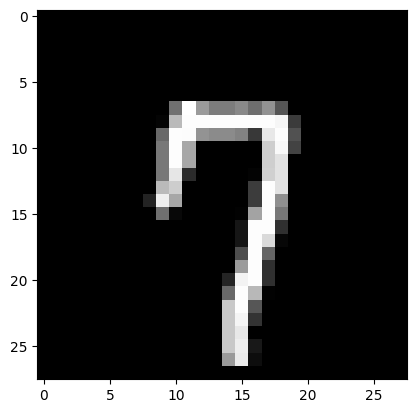

Prediction:  [6]
Label:  6


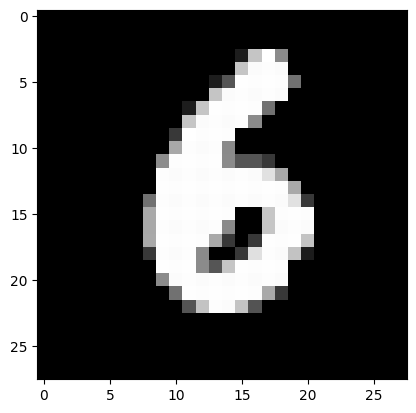

Prediction:  [3]
Label:  3


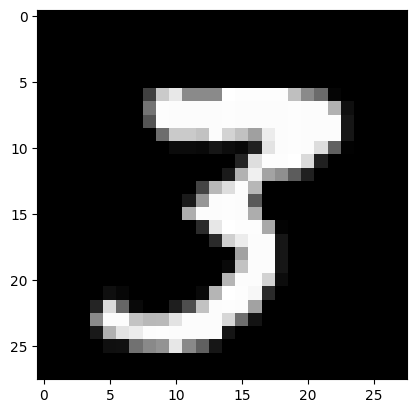

Prediction:  [1]
Label:  1


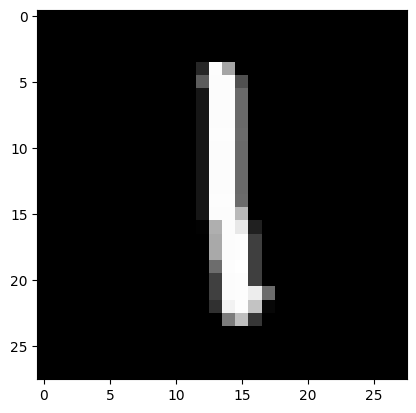

In [66]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [67]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 8 9 5 3 8 1 7 4 7 5 9 3 8 2 9 2 5 5 7 4 4 2 2 7 5 3 2 1 0 8 7 7 9 4 5
 3 5 6 9 7 7 1 4 1 8 1 5 0 9 4 2 1 0 4 8 7 2 4 7 6 9 7 9 1 0 4 3 6 2 3 6 2
 7 1 3 8 1 9 5 0 7 4 4 2 7 1 5 7 9 0 9 6 6 5 5 0 2 1 2 2 2 2 9 5 1 6 7 3 5
 6 5 5 0 9 0 3 9 0 4 8 6 6 7 6 0 1 0 9 4 1 0 0 3 7 9 3 9 0 5 9 0 7 3 5 6 1
 2 1 9 3 1 1 3 2 1 9 0 4 4 5 9 5 6 5 6 6 7 1 8 6 8 5 7 5 7 2 2 7 1 7 5 7 1
 4 7 3 2 5 9 4 0 8 1 7 3 0 5 6 4 6 6 1 4 3 6 2 1 2 3 9 7 7 3 9 3 4 2 0 2 8
 8 6 2 2 8 9 2 3 7 0 2 0 3 2 1 2 1 7 7 6 4 7 9 5 9 3 1 7 5 1 4 7 9 7 0 7 6
 4 4 8 3 2 4 4 9 2 8 0 4 2 1 1 9 9 2 5 2 1 4 3 0 4 0 6 4 0 6 7 3 1 2 1 0 1
 6 6 9 8 4 9 7 8 2 6 6 5 9 8 4 3 4 4 8 1 4 1 5 6 7 3 1 7 0 4 0 4 0 1 2 5 5
 4 3 1 3 3 3 1 3 3 3 3 8 9 1 5 2 9 4 2 1 3 4 9 6 1 9 9 9 2 5 6 4 3 7 9 7 1
 7 9 1 3 9 9 2 9 0 6 7 1 1 0 8 6 2 8 5 8 4 7 2 3 9 0 0 3 6 8 3 2 0 6 2 2 2
 9 7 0 0 0 1 9 5 2 8 0 7 6 0 4 7 1 4 8 1 1 7 7 3 6 0 2 0 6 9 7 7 6 2 5 1 3
 5 3 6 9 8 4 7 2 3 8 0 6 3 1 0 9 0 7 7 6 9 0 5 1 6 7 7 3 3 1 6 8 5 4 5 9 7
 1 4 4 0 8 7 1 3 8 3 4 0 

0.838